#### 1. Use *fig.add_[h/v]line()* and *fig.add_[h/v]rect()* to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of *flipper_length_mm* for each _species_ onto _plotly_ histograms of *flipper_length_mm* for each _species_ in the penguins dataset<br>

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import seaborn as sns

# 1. Load the Penguins dataset
penguins = sns.load_dataset('penguins')

# 2. Drop rows with missing values in 'flipper_length_mm' or 'species'
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# 3. Calculate required statistics for each species
stats = penguins.groupby('species').agg(
    mean=('flipper_length_mm', 'mean'),
    median=('flipper_length_mm', 'median'),
    min=('flipper_length_mm', 'min'),
    max=('flipper_length_mm', 'max'),
    std=('flipper_length_mm', 'std'),
    q25=('flipper_length_mm', lambda x: x.quantile(0.25)),
    q75=('flipper_length_mm', lambda x: x.quantile(0.75))
).reset_index()

# 4. Create subplots: one histogram per species
species = penguins['species'].unique()
num_species = len(species)
fig = make_subplots(
    rows=1, cols=num_species,
    subplot_titles=species,
    shared_yaxes=True
)

# 5. Plot histograms and add lines/rectangles
for i, sp in enumerate(species):
    col = i + 1
    data = penguins[penguins['species'] == sp]['flipper_length_mm']
    
    # Add histogram
    fig.add_trace(
        go.Histogram(
            x=data,
            name=sp,
            nbinsx=20,
            marker_color='lightblue',
            opacity=0.75
        ),
        row=1, col=col
    )
    
    # Retrieve statistics
    sp_stats = stats[stats['species'] == sp].iloc[0]
    mean = sp_stats['mean']
    median = sp_stats['median']
    min_val = sp_stats['min']
    max_val = sp_stats['max']
    std = sp_stats['std']
    q25 = sp_stats['q25']
    q75 = sp_stats['q75']
    
    # Define xref for the current subplot
    xref = f'x{col}'
    
    # Add vertical line for mean
    fig.add_shape(
        type='line',
        x0=mean,
        y0=0,
        x1=mean,
        y1=1,
        xref=xref,
        yref='paper',
        line=dict(color='red', dash='dash'),
    )
    
    # Add vertical line for median
    fig.add_shape(
        type='line',
        x0=median,
        y0=0,
        x1=median,
        y1=1,
        xref=xref,
        yref='paper',
        line=dict(color='blue', dash='dot'),
    )
    
    # Add rectangle for Range (min to max)
    fig.add_shape(
        type='rect',
        x0=min_val,
        y0=0,
        x1=max_val,
        y1=1,
        xref=xref,
        yref='paper',
        fillcolor='green',
        opacity=0.1,
        line_width=0
    )
    
    # Add rectangle for Interquartile Range (Q1 to Q3)
    fig.add_shape(
        type='rect',
        x0=q25,
        y0=0,
        x1=q75,
        y1=1,
        xref=xref,
        yref='paper',
        fillcolor='orange',
        opacity=0.2,
        line_width=0
    )
    
    # Add rectangle for two standard deviations from the mean
    sd_low = mean - 2 * std
    sd_high = mean + 2 * std
    fig.add_shape(
        type='rect',
        x0=sd_low,
        y0=0,
        x1=sd_high,
        y1=1,
        xref=xref,
        yref='paper',
        fillcolor='purple',
        opacity=0.1,
        line_width=0
    )

# 6. Update layout for better visualization
fig.update_layout(
    title_text='Flipper Length Distribution by Penguin Species',
    bargap=0.2,
    height=600,
    width=300 * num_species,  # Adjust width based on number of species
    showlegend=False
)

# Display the interactive plot
fig.show()


#### 2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using _seaborn_ **kernel density estimation** (KDE) plots to produce the desired figures organized in row of three plots<br>

In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

# Load the Penguins dataset
penguins = sns.load_dataset('penguins')

# Drop rows with missing values in 'flipper_length_mm' or 'species'
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Calculate required statistics for each species
stats = penguins.groupby('species').agg(
    mean=('flipper_length_mm', 'mean'),
    median=('flipper_length_mm', 'median'),
    min=('flipper_length_mm', 'min'),
    max=('flipper_length_mm', 'max'),
    std=('flipper_length_mm', 'std'),
    q25=('flipper_length_mm', lambda x: x.quantile(0.25)),
    q75=('flipper_length_mm', lambda x: x.quantile(0.75))
).reset_index()

# Define the range for KDE
overall_min = penguins['flipper_length_mm'].min() - 5
overall_max = penguins['flipper_length_mm'].max() + 5
x_values = np.linspace(overall_min, overall_max, 500)

# Get unique species
species = penguins['species'].unique()
num_species = len(species)

# Create subplots: three per line
cols_per_row = 3
rows = (num_species + cols_per_row - 1) // cols_per_row  # Ceiling division
fig = make_subplots(
    rows=rows, cols=cols_per_row,
    subplot_titles=species,
    shared_yaxes=False
)

# Iterate over each species and plot KDE with annotations
for i, sp in enumerate(species):
    row = i // cols_per_row + 1
    col = i % cols_per_row + 1
    
    data = penguins[penguins['species'] == sp]['flipper_length_mm']
    sp_stats = stats[stats['species'] == sp].iloc[0]
    
    # Compute KDE
    kde = gaussian_kde(data)
    kde_values = kde(x_values)
    
    # Add KDE line
    fig.add_trace(
        go.Scatter(
            x=x_values,
            y=kde_values,
            mode='lines',
            name=f'{sp} KDE',
            line=dict(color='blue')
        ),
        row=row, col=col
    )
    
    # Add vertical line for mean
    fig.add_trace(
        go.Scatter(
            x=[sp_stats['mean'], sp_stats['mean']],
            y=[0, max(kde_values)],
            mode='lines',
            line=dict(color='red', dash='dash'),
            name='Mean'
        ),
        row=row, col=col
    )
    
    # Add vertical line for median
    fig.add_trace(
        go.Scatter(
            x=[sp_stats['median'], sp_stats['median']],
            y=[0, max(kde_values)],
            mode='lines',
            line=dict(color='green', dash='dot'),
            name='Median'
        ),
        row=row, col=col
    )
    
    # Add shaded rectangle for Range (min to max)
    fig.add_shape(
        type='rect',
        x0=sp_stats['min'],
        y0=0,
        x1=sp_stats['max'],
        y1=max(kde_values),
        xref=f'x{(row -1) * cols_per_row + col}',
        yref=f'y{(row -1) * cols_per_row + col}',
        fillcolor='rgba(0, 255, 0, 0.1)',
        line_width=0,
        layer='below'
    )
    
    # Add shaded rectangle for IQR (Q1 to Q3)
    fig.add_shape(
        type='rect',
        x0=sp_stats['q25'],
        y0=0,
        x1=sp_stats['q75'],
        y1=max(kde_values),
        xref=f'x{(row -1) * cols_per_row + col}',
        yref=f'y{(row -1) * cols_per_row + col}',
        fillcolor='rgba(255, 165, 0, 0.2)',  # Orange
        line_width=0,
        layer='below'
    )
    
    # Add shaded rectangle for two standard deviations from mean
    sd_low = sp_stats['mean'] - 2 * sp_stats['std']
    sd_high = sp_stats['mean'] + 2 * sp_stats['std']
    fig.add_shape(
        type='rect',
        x0=sd_low,
        y0=0,
        x1=sd_high,
        y1=max(kde_values),
        xref=f'x{(row -1) * cols_per_row + col}',
        yref=f'y{(row -1) * cols_per_row + col}',
        fillcolor='rgba(128, 0, 128, 0.1)',  # Purple
        line_width=0,
        layer='below'
    )
    
    # Update layout for current subplot
    fig.update_xaxes(title_text='Flipper Length (mm)', row=row, col=col)
    fig.update_yaxes(title_text='Density', row=row, col=col)

# Remove empty subplots if any
total_plots = rows * cols_per_row
if total_plots > num_species:
    for i in range(num_species, total_plots):
        row = i // cols_per_row + 1
        col = i % cols_per_row + 1
        fig.update_xaxes(visible=False, row=row, col=col)
        fig.update_yaxes(visible=False, row=row, col=col)

# Customize Layout for Better Visualization
fig.update_layout(
    title_text='Kernel Density Estimation of Flipper Length by Penguin Species',
    height=600 * rows,  # Adjust height based on number of rows
    width=500 * cols_per_row,  # Adjust width based on columns per row
    showlegend=False,
    template='plotly_white'
)

# Add annotations for legends manually since showlegend=False
# Create a separate legend
legend_items = [
    ('Mean (Red Dashed Line)', 'red', 'dash'),
    ('Median (Green Dotted Line)', 'green', 'dot'),
    ('Range (Green Shaded)', 'rgba(0, 255, 0, 0.1)', 'solid'),
    ('IQR (Orange Shaded)', 'rgba(255, 165, 0, 0.2)', 'solid'),
    ('Two SDs (Purple Shaded)', 'rgba(128, 0, 128, 0.1)', 'solid')
]

# Position the legend at the bottom
for idx, (desc, color, dash) in enumerate(legend_items):
    if 'Shaded' in desc:
        fig.add_shape(
            type='rect',
            x0=0.1 + idx * 0.2,
            y0=-0.2,
            x1=0.1 + idx * 0.2 + 0.05,
            y1=-0.15,
            xref='paper',
            yref='paper',
            fillcolor=color,
            line_width=0,
            layer='above'
        )
        fig.add_annotation(
            x=0.15 + idx * 0.2,
            y=-0.175,
            xref='paper',
            yref='paper',
            text=desc,
            showarrow=False,
            font=dict(size=12)
        )
    else:
        fig.add_trace(
            go.Scatter(
                x=[None],
                y=[None],
                mode='lines',
                line=dict(color=color, dash=dash),
                name=desc
            )
        )

# Update layout to accommodate legend
fig.update_layout(
    title_text='Kernel Density Estimation of Flipper Length by Penguin Species',
    height=600 * rows + 100,  # Adjust height to make space for legend
    width=500 * cols_per_row,
    showlegend=False,
    template='plotly_white'
)

# Display the interactive plot
fig.show()


#### 3. Search online for some images of **box plots**, **histograms**, and **kernel density estimators** (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference<br>

1. Box Plots

Pros:

    Simplicity and Clarity:Provides a clear summary of key statistical measures: median, quartiles, and potential outliers.

    Comparative Analysis:Excellent for comparing distributions across multiple categories or groups side by side.

    Space-Efficient:Requires minimal space, making it suitable for visualizing multiple datasets in a compact manner.

    Outlier Detection:Effectively highlights outliers, which can be crucial for identifying anomalies in the data.

    Non-Parametric:Does not assume any specific underlying distribution, making it versatile across different data types.

Cons:

    Lack of Detail:Does not show the actual distribution shape, such as bimodality or skewness.

    Limited Information:Provides only summary statistics without displaying the frequency or density of data points within intervals.

    Misinterpretation of Data: Different distributions can have similar box plots, potentially masking important distributional characteristics.

    Sensitivity to Outliers:Extreme outliers can sometimes distort the visualization, making it harder to interpret the central tendency and spread.

2. Histograms

Pros:

    Detailed Distribution Shape:Visualizes the frequency of data points within specified intervals (bins), revealing the distribution's shape, such as skewness, modality, and kurtosis.

    Intuitive Understanding:Easy to understand and interpret, especially for those familiar with basic statistics.

    Flexibility with Bins:The number and width of bins can be adjusted to provide different levels of detail in the distribution.

    Frequency Representation:Clearly shows how data is distributed across different ranges, highlighting areas of high and low frequency.

Cons:

    Bin Dependency:The appearance of the histogram can vary significantly based on bin size and boundaries, potentially leading to different interpretations.

    Data Sparsity Issues:In datasets with limited data points, histograms can appear sparse or misleading.

    Comparative Limitations:Comparing multiple distributions in the same histogram can lead to clutter and confusion.

    Not Suitable for Small Datasets:Histograms may not be informative when dealing with very small sample sizes.

3. Kernel Density Estimators (KDEs)

Pros:

    Smooth Representation:Provides a smooth curve representing the probability density function, which can reveal underlying distribution patterns more clearly than histograms.
    
    No Bin Dependency:Unlike histograms, KDEs do not rely on binning, eliminating the variability introduced by bin size and placement.

    Flexibility:The bandwidth parameter can be adjusted to control the smoothness of the density estimate, allowing for fine-tuned analysis.

    Better for Overlaying Multiple Distributions:Facilitates the comparison of multiple distributions by overlaying their density curves without clutter.

    Captures Multi-Modality:Can effectively identify multiple peaks (modes) in the data distribution, which might be obscured in box plots and histograms.

Cons:

    Computational Complexity:More computationally intensive to calculate, especially for large datasets.
    Bandwidth Selection Sensitivity:The choice of bandwidth can significantly affect the resulting density curve; too small a bandwidth may lead to overfitting (noisy), while too large a bandwidth may oversmooth the distribution.
    
    Less Intuitive:May be less immediately understandable to those unfamiliar with density estimation concepts compared to histograms and box plots.
    
    Potential for Misinterpretation:Without proper understanding, the smoothed curves might misrepresent the actual data distribution, especially in cases with multiple overlapping distributions.

    Not Ideal for Categorical Data:KDEs are primarily suited for continuous data and are not applicable to categorical variables.

I prefer to use Kernel Density Estimator (KDE) to show the data distribution because it clearly shows the overall shape of the data with smooth curves, does not require pre-grouping like histograms, and is suitable for comparing the distribution of multiple datasets. In addition, KDE provides a better view of multiple data and helps to gain a deeper understanding of the subtle features of the data. Although KDE is more computationally complex, it is better at presenting the details of the data.

Summary:

Our session effectively navigated through the process of visualizing data distributions using different methods, enhancing these visualizations with statistical annotations, and critically evaluating the strengths and weaknesses of each method. This comprehensive approach ensures that the chosen visualization technique aligns with the analytical goals and provides meaningful insights into the data.

https://chatgpt.com/share/66f478c6-8d80-8008-a510-410140fb778b

#### 4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions

1. Which datasets have similar means and similar variances
2. Which datasets have similar means but quite different variances
3. Which datasets have similar variances but quite different means
4. Which datasets have quite different means and quite different variances

In [16]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Similar means and similar variances:Dataset A and Dataset B both have similar means and similar variances 

The means are similar, but the variances are very different:Dataset A and Dataset C have similar means, but different variances.

The variances are similar, but the means are very different:Dataset B and Dataset D have different means but somewhat similar variances.

Dataset C and Dataset B have very different means and variances:Dataset C and Dataset D are significantly different in both mean and variance. Dataset C has two modes (bimodal distributions) with very different means, whereas Dataset D is centred on 6 and has very little variance.

#### 5. Start a new ChatBot session to explore the general relationship between the *mean* and *median* and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the *mean* and *median* and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.<br>


In [5]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

When a distribution is skewed, the relationship between the mean and median can reflect the direction of the skewness. In a right-skewed distribution, the mean is greater than the median because the extremes on the right side pull the mean up; in a left-skewed distribution, the mean is less than the median and the extremes on the left side pull the mean down. In a skewed distribution, it usually reflects the tendency to concentrate the data better than the mean.

corrected code

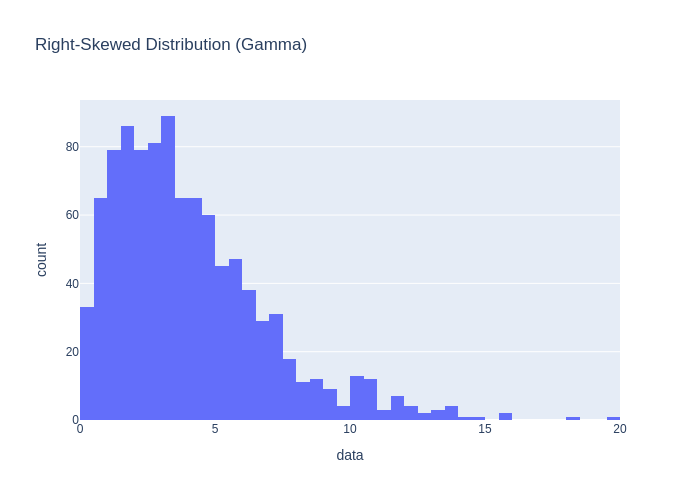

Sample 1 (Right-Skewed) Mean: 4.066808908332329
Sample 1 (Right-Skewed) Median: 3.422109553561272


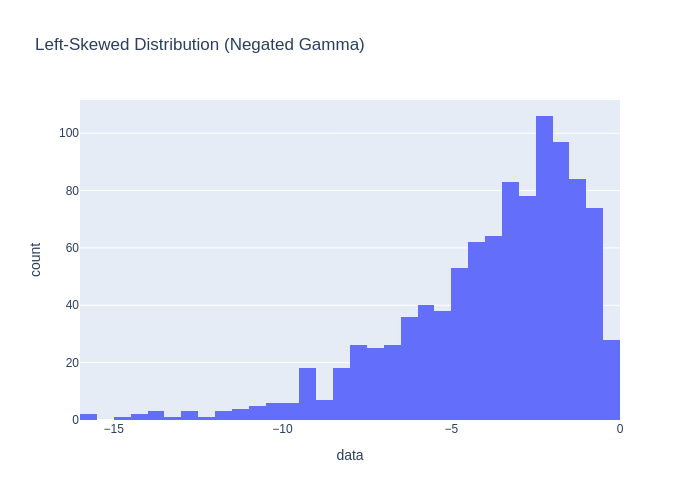

Sample 2 (Left-Skewed) Mean: -3.8373984685841718
Sample 2 (Left-Skewed) Median: -3.236198614089537

Comparison:
Difference between mean and median for right-skewed distribution: 0.6446993547710571
Difference between mean and median for left-skewed distribution: -0.6011998544946349


In [4]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# Generate a right-skewed distribution using the Gamma distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram for sample1 (right-skewed distribution)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x='data', title="Right-Skewed Distribution (Gamma)")
fig1.show(renderer='png')

# Calculate the mean and median of sample1
mean1 = sample1.mean()
median1 = np.quantile(sample1, 0.5)

# Print the results
print(f"Sample 1 (Right-Skewed) Mean: {mean1}")
print(f"Sample 1 (Right-Skewed) Median: {median1}")

# Generate a left-skewed distribution by negating the Gamma distribution
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram for sample2 (left-skewed distribution)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x='data', title="Left-Skewed Distribution (Negated Gamma)")
fig2.show(renderer='png')

# Calculate the mean and median of sample2
mean2 = sample2.mean()
median2 = np.quantile(sample2, 0.5)

# Print the results
print(f"Sample 2 (Left-Skewed) Mean: {mean2}")
print(f"Sample 2 (Left-Skewed) Median: {median2}")

# Comparing the two distributions
print("\nComparison:")
print(f"Difference between mean and median for right-skewed distribution: {mean1 - median1}")
print(f"Difference between mean and median for left-skewed distribution: {mean2 - median2}")



1.Imports:

scipy.stats: Provides functions for generating random variables from statistical distributions.

pandas: A data analysis library that is used to create a DataFrame for visualization purposes.

numpy: Provides numerical operations like calculating the median.

plotly.express: A library to generate interactive visualizations, like histograms in this case.

2.Generating Right-Skewed Distribution:

stats.gamma(a=2, scale=2) generates a Gamma distribution, which is right-skewed by nature.

rvs(size=1000) generates 1,000 random values from this Gamma distribution and stores them in sample1.

The shape parameter a=2 and the scale parameter scale=2 determine the characteristics of the distribution (higher values of a make it less skewed).

3.Visualizing Right-Skewed Distribution:

A histogram of the right-skewed data (sample1) is created using plotly.express.

The data is wrapped in a pandas DataFrame to make it easier to handle for visualization.

fig1.show(renderer='png') displays the histogram. In a right-skewed distribution, you expect to see a concentration of data on the left and a long tail extending to the right.

4.Calculating Mean and Median:

mean1 = sample1.mean(): This computes the mean of the right-skewed data.

median1 = np.quantile(sample1, 0.5): This computes the median, which is the 50th percentile of the data.

In a right-skewed distribution, the mean will typically be greater than the median because the large outliers on the right pull the mean upwards.

5.Displaying Results:

The mean and median for the right-skewed distribution are printed. Since the distribution is right-skewed, the mean should be greater than the median.

6.Generating Left-Skewed Distribution:

By multiplying the Gamma distribution by -1, we reverse its skewness, creating a left-skewed distribution.

sample2 stores 1,000 random values from the negated Gamma distribution, simulating a situation where there are extreme low values pulling the distribution’s tail to the left.

7.Visualizing Left-Skewed Distribution:

A histogram for the left-skewed distribution (sample2) is created and displayed using plotly.express.

The visualization will show a concentration of values on the right with a long tail extending to the left, typical of a left-skewed distribution.

8.Calculating Mean and Median for Left-Skewed:

mean2 = sample2.mean() calculates the mean of the left-skewed data.

median2 = np.quantile(sample2, 0.5) computes the median.

In a left-skewed distribution, the mean will typically be less than the median, because the extreme low values drag the mean downward.

9.Displaying Left-Skewed Results:

The mean and median for the left-skewed distribution are printed. The mean is expected to be less than the median in this case.

10.Comparing the Two Distributions:

The differences between the mean and median for both distributions are printed for comparison.

In a right-skewed distribution, the mean is larger than the median because of the influence of extreme high values.

In a left-skewed distribution, the mean is smaller than the median due to the influence of extreme low values.

Summary:

In this session, we discussed the relationship between the **mean** and **median** in **right** and **left skewed** distributions. For right-skewed distributions, the mean is typically greater than the median, while for left-skewed distributions, the mean is less than the median due to the influence of extreme values in the tail.

You also provided Python code that generates right- and left-skewed data using the Gamma distribution, calculates the mean and median, and plots histograms to visualize the data. I explained how the code works, including the creation of histograms using Plotly, calculating central tendency measures, and comparing the results for both distributions.

Lastly, I extended the code to include a comparison of the differences between the mean and median in both skewed distributions for further analysis.

https://chatgpt.com/share/66f5e73d-be10-8008-a39a-eef9b79ee016

#### 6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data<br>

1. Your approach should likely follow what was suggested for the **Week 02 TUT Communication Activity from TUT**
2. In the **Week 03 TUT Communication Activity from TUT** you will be put in groups and determine which group members dataset introduction will be presented by the group

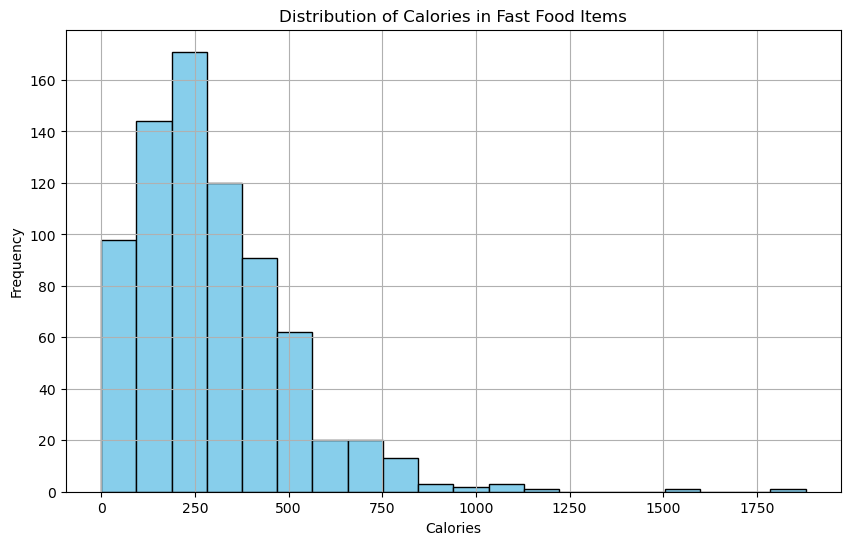

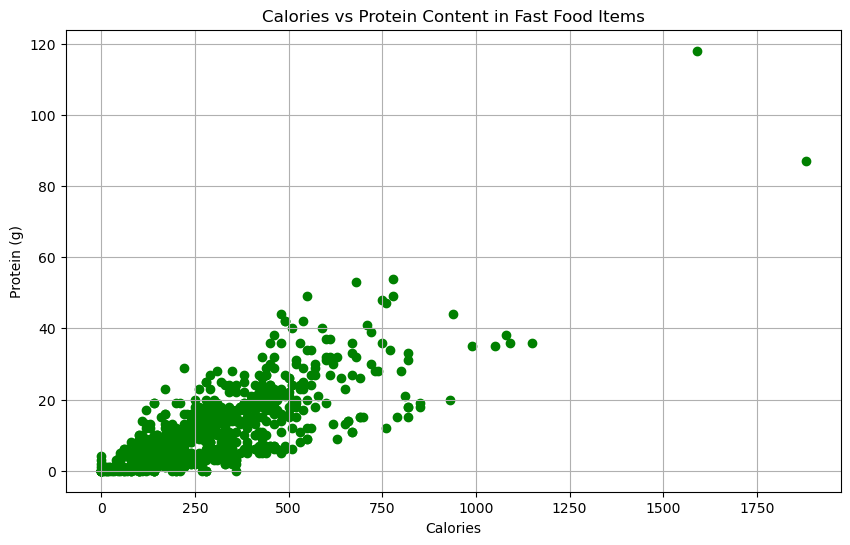

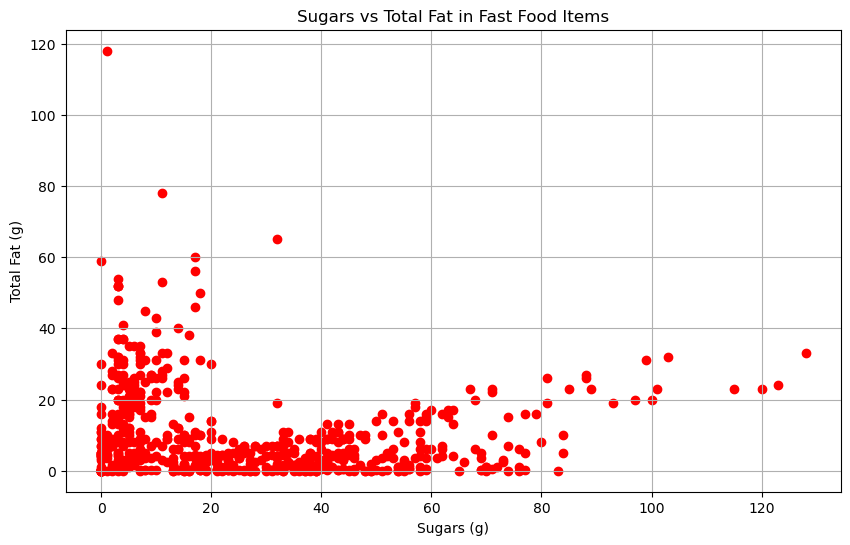

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv"
df = pd.read_csv(url)

# Clean 'total fat (g)' column (removing non-numeric characters)
df['total fat (g)'] = pd.to_numeric(df['total fat (g)'], errors='coerce')

# Plot 1: Calories distribution
plt.figure(figsize=(10, 6))
plt.hist(df['calories'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Calories in Fast Food Items')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot 2: Relationship between Calories and Protein
plt.figure(figsize=(10, 6))
plt.scatter(df['calories'], df['protein (g)'], color='green')
plt.title('Calories vs Protein Content in Fast Food Items')
plt.xlabel('Calories')
plt.ylabel('Protein (g)')
plt.grid(True)
plt.show()

# Plot 3: Sugars vs Total Fat
plt.figure(figsize=(10, 6))
plt.scatter(df['sugars (g)'], df['total fat (g)'], color='red')
plt.title('Sugars vs Total Fat in Fast Food Items')
plt.xlabel('Sugars (g)')
plt.ylabel('Total Fat (g)')
plt.grid(True)
plt.show()


The following visualisations are based on the fast food nutritional dataset:

Calorie distribution: the histogram shows that the majority of fast food products have a calorie content between 0 and 500 calories, with peaks in the 200-300 calorie range.

Calories vs. Protein: The scatterplot shows a positive correlation between calories and protein content - foods with higher calories also tend to contain more protein.

Sugar vs. Total Fat: This scatterplot shows a weaker relationship between sugar and total fat content. Some products are high in both, but there is no clear linear trend.

#### 7. Watch the classic [Gapminder Video](https://www.youtube.com/watch?v=jbkSRLYSojo), then have a look at the [`plotly` version](https://plotly.com/python/animations/) and recreate the animation (perhaps after optionally exploring and changing the [style](https://plotly.com/python/templates/), if you wish)

In [39]:
import plotly.express as px

# Load the built-in Gapminder dataset
df = px.data.gapminder()

# Create an animated bubble chart
fig = px.scatter(df, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country",
                 size="pop", 
                 color="continent", 
                 hover_name="country",
                 log_x=True, 
                 size_max=60, 
                 range_x=[100,100000], 
                 range_y=[20,90])

# Update layout and style
fig.update_layout(title='Health vs Wealth over Time (Gapminder)',
                  xaxis_title='GDP per Capita (log scale)',
                  yaxis_title='Life Expectancy',
                  showlegend=True)

# Show the animated chart
fig.show()


#### 8. Provide a second version of the figure from the previous problem where you edit the `fig = px.scatter()` function from the Gapminder code so that `x` is "percent change", `y` is "rank", `size` is "percent", and `color`="sex", `animation_frame` is "year", and `animation_group` and `hover_name` are "name". Then use `size_max=50`, `range_x=[-0.005,0.005])` and remove the `log_x=True` and `range_y` parameters

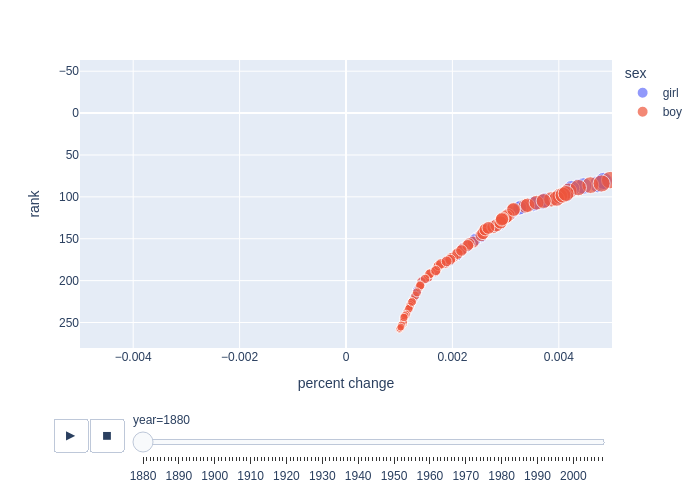

In [40]:
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct by appending the sex
bn['name'] = bn['name'] + " " + bn['sex']

# Calculate the rank of each name per year (1 is most popular)
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort the data by name and year
bn = bn.sort_values(['name', 'year'])

# Calculate percent change from the previous year for each name
bn['percent change'] = bn['percent'].diff()

# Identify new names (first occurrence) and set their percent change to current percent
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort data by year
bn = bn.sort_values('year')

# Restrict to "common" names with percent > 0.001
bn = bn[bn.percent > 0.001]

# Create the animated scatter plot
fig = px.scatter(
    bn, 
    x="percent change", 
    y="rank", 
    animation_frame="year", 
    animation_group="name",
    size="percent", 
    color="sex", 
    hover_name="name",
    size_max=50, 
    range_x=[-0.005, 0.005]
)

# Reverse the y-axis to place rank 1 at the top
fig.update_yaxes(autorange='reversed')

# Display the animated plot
fig.show(renderer="png")  


#### 9. Have you reviewed the course [wiki-textbook](https://github.com/pointOfive/stat130chat130/wiki) and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br><br>

Yes, I have looked at the course wiki and textbook and interacted with ChatBot to help me understand the material in the tutorials and lectures.